###### Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# Business Problem:
`Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. `

- investigate whether there are differences across the product with respect to customer characteristics.

1. Descriptive analytics to create a customer profile for each AeroFit treadmill product.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
# About given Dataset : 

- Product Purchased :	KP281, KP481, or KP781
- Age :	In years
- Gender :	Male/Female
- Education :	In years
- MaritalStatus :	Single or partnered
- Usage :	The average number of times the customer plans to use the treadmill each week.
- Income :	Annual income (in USD)
- Fitness :	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles :	The average number of miles the customer expects to walk/run each week

Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)

In [3]:
df = pd.read_csv("aerofit_treadmill.txt")

In [4]:
df.shape

(180, 9)

In [5]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.tail(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [7]:
# info about data/ columns and their datatypes: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### checking for Null Values in each columns

In [9]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
# No null values found in dataset. 

# Pre-Processing Data for Analysis: 

#### `Fitness Category `

In [11]:
# Converted fitness rating from Int to Object ! : 


In [12]:
df["Fitness_category"] = df["Fitness"]

In [13]:
df["Fitness_category"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness_category, dtype: int64

In [14]:
df["Fitness_category"].replace({1:"Poor Shape",
                               5:"Excellent Shape",
                               4:"Good Shape",
                               3:"Average Shape",
                               2:"Bad Shape"},inplace=True)

In [15]:
# Product Portfolio:

# The KP281 is an entry-level treadmill that sells for $1,500.
# The KP481 is for mid-level runners that sell for $1,750.
# The KP781 treadmill is having advanced features that sell for $2,500.

#### `Merging Price data with original DataSet `

In [16]:
product_price = pd.DataFrame({
    "Product":["KP281","KP481","KP781"],
    "Product_price":[1500,1750,2500]
    
})
product_price

,Product,Product_price
0,KP281,1500
1,KP481,1750
2,KP781,2500


In [17]:
data = df.merge(product_price,on="Product",how = "left")

#### `Segmentising Age groups `

In [18]:
data["Age_category"] = data["Age"]

In [19]:
data["Age_category"] = pd.cut(data["Age_category"], bins =[0,21,35,45,60], include_lowest=True, labels=["Teen(0-21)","Adult(22-35)","mid_age(36-45)","Towards_old-age(>46)"])

In [20]:
data["Age_category"] =data["Age_category"].astype("object")

# `Data Ready for Analysis :`

In [21]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Product_price,Age_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,1500,Teen(0-21)
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,1500,Teen(0-21)
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,1500,Teen(0-21)
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,1500,Teen(0-21)
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,1500,Teen(0-21)
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape,2500,mid_age(36-45)
176,KP781,42,Male,18,Single,5,4,89641,200,Good Shape,2500,mid_age(36-45)
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape,2500,mid_age(36-45)
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape,2500,Towards_old-age(>46)


### describing categorical features : : 

In [22]:
data.describe(include="object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107
Fitness_category,180,5,Average Shape,97
Age_category,180,4,Adult(22-35),135


### Describing numeric Data : 

In [23]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


###  `from above information , `
1. `Median Age of Customer is 26 years.`
2. `Maximum users are Adults(22-35) years and are Male and Married.`
3. `Maximum Selling Product is KP281.`
4. `Maximum numbers of customers' fitness level is above average(>3 according to given data).`
5. `Median Miles run/walk per customer : 94 Miles`


#### `Additional information from data : `

`median income of the customers :50596.5 USD`
`Median of average usage per customer : 3 days a week`

`Average Customer education is 15 to 16 years: `






### Correlation Between Features

In [24]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923
Product_price,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000


<AxesSubplot:>

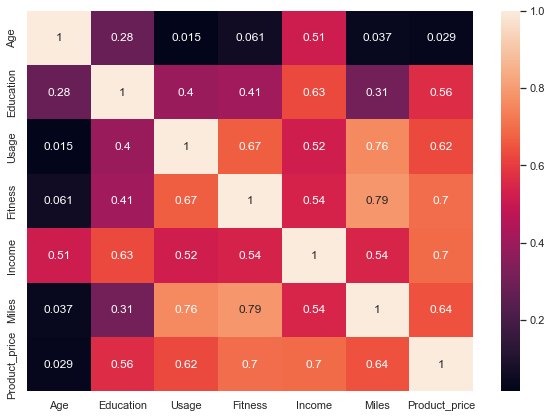

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

#### features with higher correlation : >0.6


In [26]:
# features with higher correlation : >0.65

data.corr().unstack()[(data.corr().unstack()>0.65) & (data.corr().unstack()!=1)]

Usage          Fitness          0.668606
               Miles            0.759130
Fitness        Usage            0.668606
               Miles            0.785702
               Product_price    0.696616
Income         Product_price    0.695847
Miles          Usage            0.759130
               Fitness          0.785702
Product_price  Fitness          0.696616
               Income           0.695847
dtype: float64

#### `Important correlations : `


1. Fitness &  Miles : 0.785702
2. Product_price & Income : 0.695847



In [27]:
d = data[["Age","Education","Fitness","Income","Miles","Gender"]]

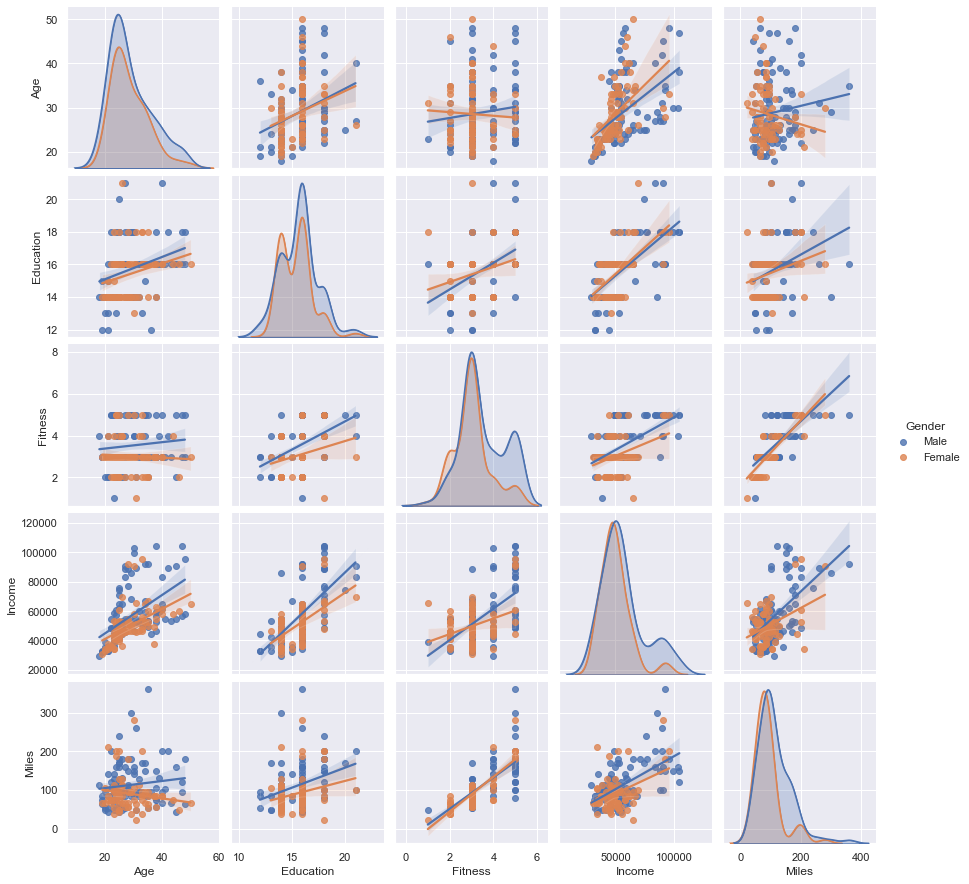

In [28]:
x = sns.pairplot(d,
                kind = "reg",
                hue="Gender")
x.map_diag(sns.kdeplot)
plt.show()

### Distribution of all numerical features : and check for outliers : 


In [29]:
d = data[["Age","Education","Usage","Fitness","Income","Miles","Gender"]]


#### Distribution of Miles run by customer in given Data

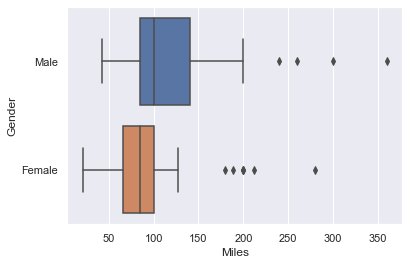

In [30]:
sns.boxplot(x = "Miles",data = d,y="Gender")
plt.show()

In [31]:
IQR = np.percentile(data["Miles"],75)  -   np.percentile(data["Miles"],25)
Q3 = np.percentile(data["Miles"],75)
Q1 = np.percentile(data["Miles"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

187.875

In [32]:
Q1

66.0

In [33]:
Q3

114.75

In [34]:
IQR

48.75

In [35]:
outlier_data = data[data["Miles"]>UpperWhisker]
print("Outliers : ",len(outlier_data))

Outliers :  13


##### Insights from Customers who run more than 187.875 (outliers).

In [36]:
outlier_data["Product"].value_counts()

KP781    11
KP281     1
KP481     1
Name: Product, dtype: int64

In [37]:

outlier_data["Fitness_category"].value_counts()

Excellent Shape    11
Good Shape          2
Name: Fitness_category, dtype: int64

13 outlier in column "Miles".
Customers who fall in outliers as per their miles run/walk , uses product KP781 and are in excellent shape.




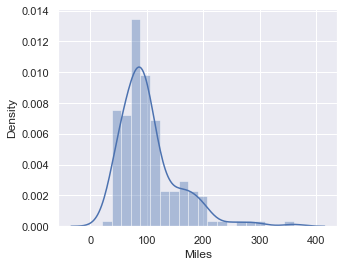

In [38]:
plt.figure(figsize=(5,4))
sns.distplot(data["Miles"])
plt.show()


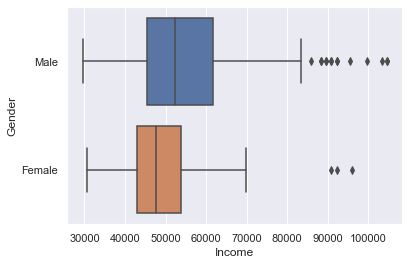

In [39]:
sns.boxplot(x = "Income",data = d,y="Gender")
plt.show()

In [40]:
IQR = np.percentile(data["Income"],75)-np.percentile(data["Income"],25)
Q3 = np.percentile(data["Income"],75)
Q1 = np.percentile(data["Income"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

80581.875

In [41]:
(data["Income"] > UpperWhisker).value_counts()

False    161
True      19
Name: Income, dtype: int64

##### # 19 customers who's spending capacity is way more than most of the customers 

# General Sales Analysis  :

In [42]:
data["Gender"].value_counts()


Male      104
Female     76
Name: Gender, dtype: int64

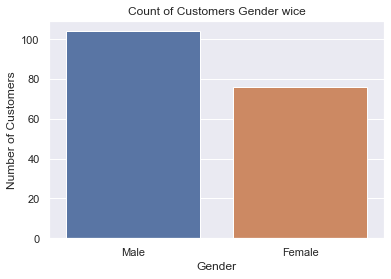

In [43]:
sns.countplot(x = "Gender" , data = data)
plt.title("Count of Customers Gender wice")

plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

### Quantity per Product Sold 

In [44]:
data["Product"].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

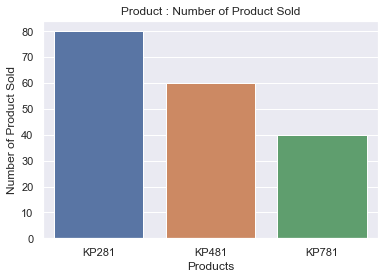

In [45]:
sns.barplot(x = data["Product"].value_counts().index,
           y = data["Product"].value_counts())
plt.title("Product : Number of Product Sold")

plt.xlabel("Products")
plt.ylabel("Number of Product Sold")
plt.show()

In [46]:
data.groupby("Product")["Product_price"].sum()

Product
KP281    120000
KP481    105000
KP781    100000
Name: Product_price, dtype: int64

Text(0, 0.5, 'Revenue Per Product')

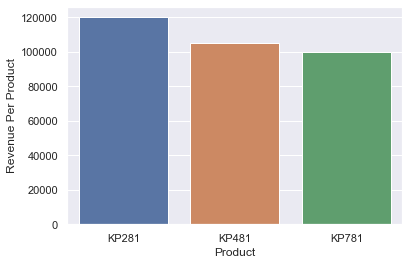

In [47]:
sns.barplot(x = data.groupby("Product")["Product_price"].sum().index,
           y = data.groupby("Product")["Product_price"].sum())

plt.ylabel("Revenue Per Product")

### Highest Selling Product is KP281  and other product's numbers are also significant.

### As shown below Calulation , is the revenue generater per Product : 
###### for  KP281 is highest (120000 USD ) and for KP481 and KP781 are around same as 100000 USD.

## Two-Way Contingency Table : 


## `Across gender`

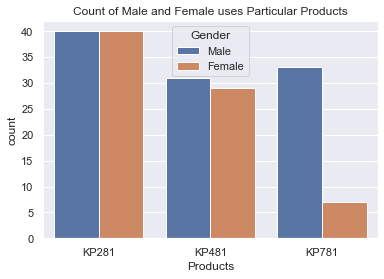

In [48]:
sns.countplot(x = "Product", data= data, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [49]:
pd.crosstab([data["Product"]],df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [50]:
((pd.crosstab(data["Product"],data["Gender"],margins=True))/180)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


##### Marginal Probability  : 

(from above tables)

Probability of Male Customer Purchasing any product is : 57.77 %

Probability of Female Customer Purchasing any product is : 42.22 %

##### Marginal Probability of any customer buying

product KP281  is : 44.44 %  (cheapest / entry level product)

product KP481  is : 33.33 % ( for intermediate users)

product KP781  is : 22.22 % ( product for extensive use who run/walk more miles)



### Conditional Probabilities : 

In [51]:
(pd.crosstab([data["Product"]],data["Gender"],margins=True,normalize="columns"))*100


Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


#### Probability of users of KP281 given they male : 
 


##### Probability of Selling Product 
`KP281 | Female = 52 %`

`KP481 | Female = 38 %`

`KP781 | Female = 10 %`
    
`KP281 | male = 38 %`

`KP481 | male = 30 %`

`KP781 | male = 32 %`

                               

            


Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers. 

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%). 

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user. 


## `Across Marital Status`

In [52]:
data["MaritalStatus"].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

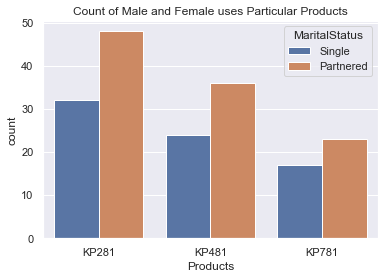

In [53]:
sns.countplot(x = "Product", data= data, hue = "MaritalStatus")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [54]:
pd.crosstab([data["Product"]],df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [55]:
(pd.crosstab([data["Product"]],df["MaritalStatus"],margins=True)/180)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000



Marginal Probability for 
- Married Customers : 59.44 % 
- Single Customers : 40.555 %
    


In [56]:
pd.crosstab([data["Product"]],df["MaritalStatus"],margins=True,normalize="columns")*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.859813,43.835616,44.444444
KP481,33.644860,32.876712,33.333333
KP781,21.495327,23.287671,22.222222



KP281 | Partnered = 44.85 %

KP481 | Partnered = 33.64 %

KP781 | Partnered = 21.49 %
 
 
KP281 | Single = 43.83 %

KP481 | Single = 32.87 %

KP781 | Single = 23.28 %




Probability of Married Person purchasing any product is 59.44 % 

Probability of Single  Person purchasing any product is 40.55 % 

Probability of a Married person buying product KP281 and KP481 is slightly higher than the customers who are single. 

Probability of a single person buying KP781 is higher than Married customers. 

So , KP781 is also recommended for people who are single and exercises more. 



# Product - Gender - Mile

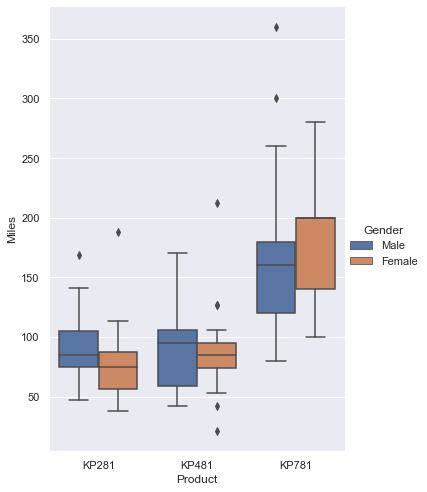

In [57]:
sns.catplot(x= "Product", y = "Miles",hue="Gender" ,kind = "box", data= data,height=7, aspect=8/11 )
plt.xticks(rotation = 0)
plt.show()

`Since, the variation  for Product KP481 for particularly Male is more , we can say KP481 is good for people who want to run/walk for 60 to 130 miles a week. It is more a genera purpose product for intermediate use.`

In [58]:
np.round(pd.crosstab([data["Product"]],df["Gender"],values=data["Miles"],aggfunc=np.mean,margins=True),2)

Gender,Female,Male,All
Product,,,
KP281,76.20,89.38,82.79
KP481,87.34,88.48,87.93
KP781,180.00,164.12,166.90
All,90.01,112.83,103.19


#### Observations and Insights:

- From charts and Crosstab of average miles run by customer for particular product: 

- Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product. 
- KP781 can be recommended for Female customers who exercises extensively.

- Males customers who are running average of 90 miles (average exercise) , are using product KP281 .

- Males customers who are running average of 87 miles (average exercise) , are using product KP481 . and for female average running for same product is 88 miles. 


### Overall Picture over  Few categorical and Numerical features :

<AxesSubplot:xlabel='Miles', ylabel='Income'>

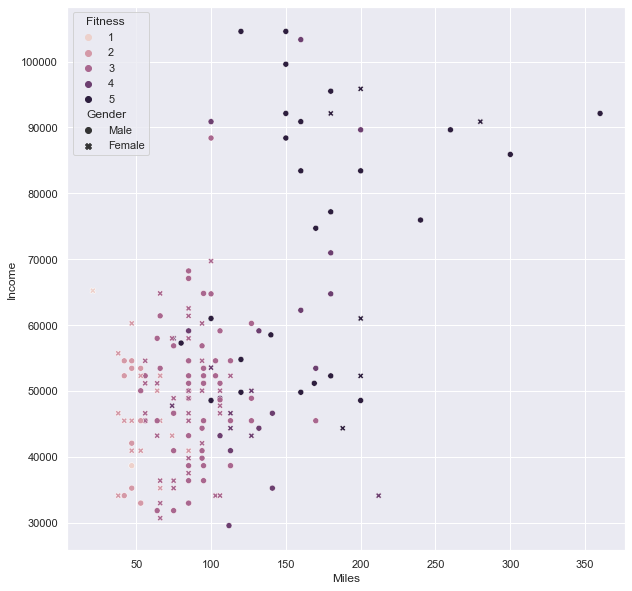

In [59]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = "Miles",y="Income",data = data, hue= "Fitness",style="Gender")

- Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.
- Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level. 
- Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles. 



## `Product | Miles - Fitness `

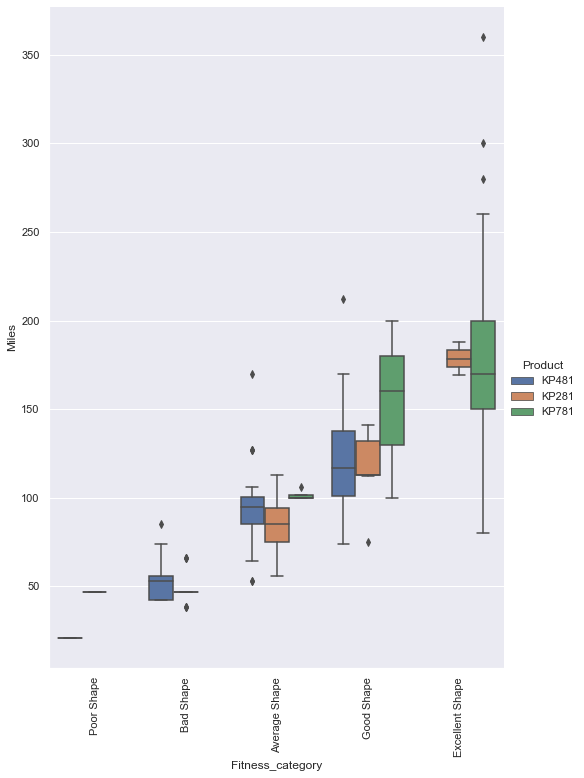

In [60]:

sns.catplot(x= "Fitness_category", y = "Miles" ,kind = "box",hue="Product", data= data.sort_values(by="Fitness"),height=10, aspect=8/11)
plt.xticks(rotation = 90)
plt.show()

## `Product - Miles `

`People who run/walk more miles(>130) , are more likely to use KP781 product ! `

`People who walk/run around 60 to 130 miles are more likely to use KP281 and KP481 products.`

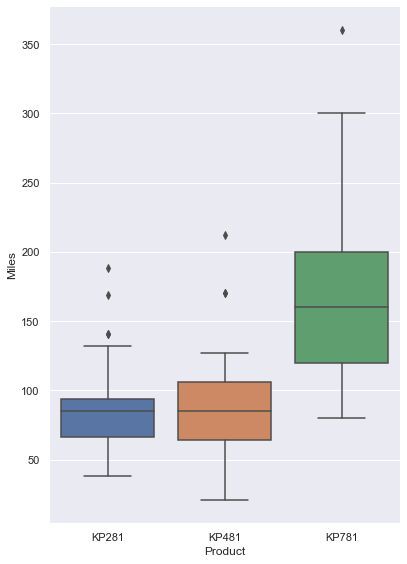

In [61]:

sns.catplot(x= "Product", y = "Miles" ,kind = "box", data= data,height=8, aspect=8/11)
plt.xticks(rotation = 0)
plt.show()

`Customers who walk/run 70-90 miles, are  using KP281 `

`Customers who walk/run 70-130 or more miles are using  KP481.`

`Customers who walk/run 120 to 200 or more miles uses KP781.`

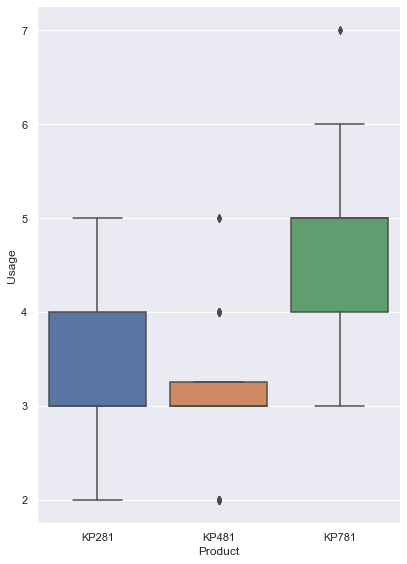

In [62]:


sns.catplot(x= "Product", y = "Usage" ,kind = "box", data= data,height=8, aspect=8/11)
plt.xticks(rotation = 0)
plt.show()


`Customers who uses Treadmill 4 to 6 days a week  , are more likely to use KP781 .`

`Customers who uses Treadmill 3 to 4 days a week  , are more likely to use KP481 .`

`Customers who uses Treadmill 3 to 4 days a week  , are more likely to use KP281 .`


## `Correlation Between Income and Product Price : `

#### Observations and Insights:

from  Plot, 
- we can see a positive trend , that who are earning more are likely to buy the costlier product. 
- people are in excellent and good shape, they are more likely spend mor amount and buy the costlier product which can be more reliable for extensive use. 


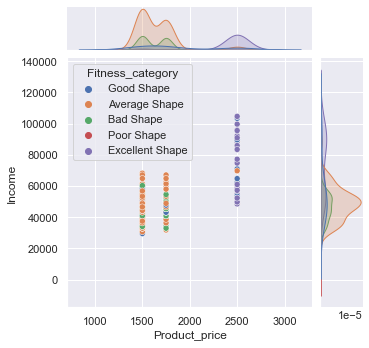

In [63]:
sns.jointplot(x = data["Product_price"],
              y= data["Income"],
             height=5, kind="scatter",hue=data["Fitness_category"])

<AxesSubplot:xlabel='Product_price', ylabel='Income'>

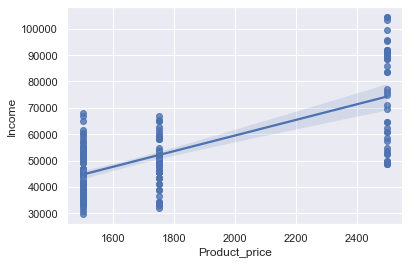

In [64]:
sns.regplot(x = data["Product_price"],
              y= data["Income"],)

### Relashion of Miles and FitnessLevel

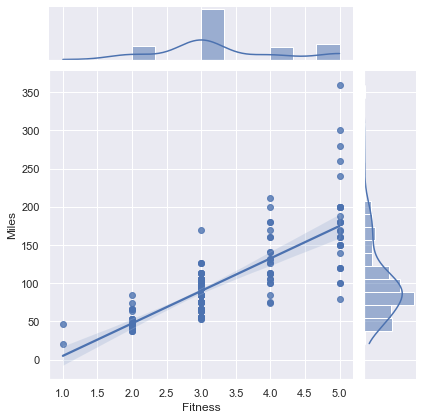

In [65]:
sns.jointplot(x = data["Fitness"],
              y= data["Miles"],
             height=6, kind="reg") # ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], 

## `Correlation between Income and miles :`

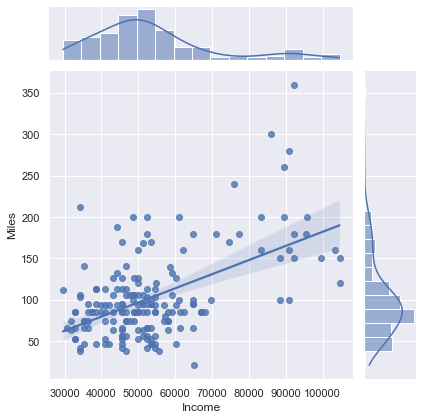

In [66]:
sns.jointplot(x = data["Income"],
              y= data["Miles"],
             height=6, kind="reg") # ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], 

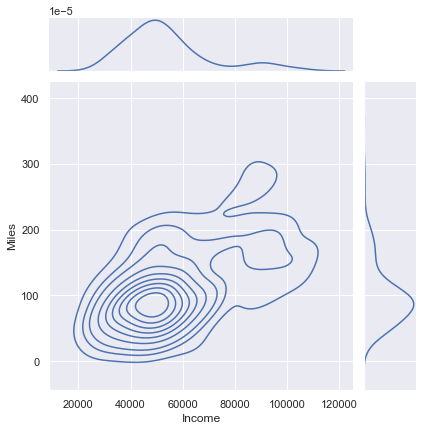

In [67]:
sns.jointplot(x = data["Income"],
              y= data["Miles"],
             height=6, kind="kde") # ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], 

#### Observations and Insights:

- Majority customer base has earning from 25,000 to 75,000USD 
- and prefer to exercises very less to 175 miles a week. 

# Customer Age

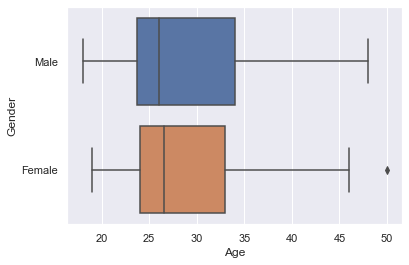

In [68]:
sns.boxplot(x = "Age",data = d,y="Gender")
plt.show()

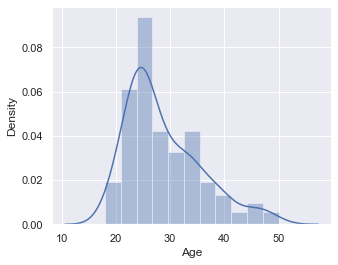

In [69]:
plt.figure(figsize=(5,4))
sns.distplot(data["Age"])
plt.show()


### Age category of customers per Product : 

In [70]:
data.loc[data["Product"]=="KP281"]["Age_category"].value_counts()

Adult(22-35)            56
mid_age(36-45)          11
Teen(0-21)              10
Towards_old-age(>46)     3
Name: Age_category, dtype: int64

In [71]:
data.loc[data["Product"]=="KP481"]["Age_category"].value_counts()

Adult(22-35)            45
Teen(0-21)               7
mid_age(36-45)           7
Towards_old-age(>46)     1
Name: Age_category, dtype: int64

In [72]:
data.loc[data["Product"]=="KP781"]["Age_category"].value_counts()

Adult(22-35)            34
mid_age(36-45)           4
Towards_old-age(>46)     2
Name: Age_category, dtype: int64

In [73]:
pd.crosstab(index=data["Product"],columns=data["Age_category"], margins=True)

Age_category,Adult(22-35),Teen(0-21),Towards_old-age(>46),mid_age(36-45),All
Product,,,,,
KP281,56,10,3,11,80
KP481,45,7,1,7,60
KP781,34,0,2,4,40
All,135,17,6,22,180


In [74]:
np.round((pd.crosstab(index=data["Product"],columns=data["Age_category"],normalize="columns", margins=True))*100,2)

Age_category,Adult(22-35),Teen(0-21),Towards_old-age(>46),mid_age(36-45),All
Product,,,,,
KP281,41.48,58.82,50.00,50.00,44.44
KP481,33.33,41.18,16.67,31.82,33.33
KP781,25.19,0.00,33.33,18.18,22.22


In [75]:
np.round((pd.crosstab(index=data["Product"],columns=data["Age_category"], margins=True)),2)

Age_category,Adult(22-35),Teen(0-21),Towards_old-age(>46),mid_age(36-45),All
Product,,,,,
KP281,56,10,3,11,80
KP481,45,7,1,7,60
KP781,34,0,2,4,40
All,135,17,6,22,180


In [76]:
data.groupby("Age_category")["Product"].count()

Age_category
Adult(22-35)            135
Teen(0-21)               17
Towards_old-age(>46)      6
mid_age(36-45)           22
Name: Product, dtype: int64

from above distribution , 

Most of the customer base is from Age category Adult (22-35) : 135 customer . 

customers who are in Teen and mid_age category are 17 , 22 . 

`Probability of Teen Age Customer buying KP281 is 58.82 % , and KP481 is 41.18 %.`

`Probability of Adult buying KP281 is  41.48%  , KP481 is 33.33% and KP781 is 25.19%.`

`Probability of Customer age above 46 buying KP281 is 50%  , KP481 is 16.67% and KP781 is 33.33%.`

`Probability of Customer of mid age(36-45 years) buying KP281 is 50%  , KP481 is 31.82% and KP781 is 18.18%.`


# Fitness category 

In [77]:
pd.crosstab(columns=data["Fitness_category"],index=data["Product"],margins=True)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape,All
Product,,,,,,
KP281,54,14,2,9,1,80
KP481,39,12,0,8,1,60
KP781,4,0,29,7,0,40
All,97,26,31,24,2,180


In [78]:
np.round(pd.crosstab(index=data["Product"],columns=data["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0




if the person is in excellent shape , the probabiliy that he is using KP781 is more than 90 %.





# `Customer Profiling - Categorization of users.`

### `KP281 : `

- Most affordable and entry level and Maximum Selling Product.
-  This model popular amongst both Male and Female customers 
-  Same number of  Male and Female customers.
-  Customers  walk/run average 70 to 90 miles on this product.
-  Customers use  3 to 4 times a week 
-  Fitness Level of this product users is Average Shape.
- More general purpose for all age group and fitness levels. 


### `KP481 :`

- Intermediate Price Range 
- Fitness Level of this product users varies from Bad to  Average Shape depending on their usage.
- Customers prefer KP481 model to use less frequent but to run more miles per week on this.
- Customer walk/run average  70 to 130 or more miles per week on his product.
- has higher probability of selling for female customers.
- Probability of Female customer buying KP481 is significantly higher than male.
 - KP481 product is specifically recommended for Female customers who are intermediate user. 
- customers are from  adult, teen and mid-age  categories.

### `KP781 :`

-  least sold product. 
- high price and preferred by customers who does exercises more extensively and run more miles.
- Customer walk/run average  120 to 200 or more miles per week on his product.
-  Customers use  4 to 5 times a week at least.
- If person is in Excellent Shape  , the probability that he is using KP781 is more than 90%.
- Female Customers who are running average 180 miles (extensive exercise) , are using product  KP781, which is higher than Male average using same product. 
-  KP781 can be recommended for Female customers who exercises extensively.
-  Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%). 
-  Probability of a single person buying KP781 is higher than Married customers. 
    So , KP781 is also recommended for people who are single and exercises more. 
- most of old people who are above 45 age and adult uses this product. 


# `Recommendations  : `

- Recommend KP781 product to users who exercises/run more frequently and run more and more miles ,  and have high income.  Since Kp781 is least selling product (22.2% share of all the products) ,  recommend this product some customers who exercise at intermediate to extensive level , if they are planning to go for KP481. Also the targeted Age Category is Adult and age above 45.

- Recommend KP481 product specifically for female customers who run/walk more miles , as data shows their probability is higher. Statistical Summery about fitness level and miles for KP481 is not good as KP281 which is cheaper product. Possibly because of price, customers prefer to purchase KP281. It is recommended to make some necessary changes to product K481 to increase customer experience.



# Some necessary exploration on Cross Tabs : 


In [79]:
pd.crosstab(index=[data["Product"],data["Fitness_category"]],columns=data["Gender"])

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [80]:
pd.crosstab(index=[data["Product"],data["Fitness_category"]],columns=data["Gender"],normalize="index")*100

Gender                        Female        Male
Product Fitness_category                        
KP281   Average Shape      48.148148   51.851852
        Bad Shape          71.428571   28.571429
        Excellent Shape    50.000000   50.000000
        Good Shape         33.333333   66.666667
        Poor Shape          0.000000  100.000000
KP481   Average Shape      46.153846   53.846154
        Bad Shape          50.000000   50.000000
        Good Shape         50.000000   50.000000
        Poor Shape        100.000000    0.000000
KP781   Average Shape      25.000000   75.000000
        Excellent Shape    17.241379   82.758621
        Good Shape         14.285714   85.714286

In [81]:
data[data["Miles"]>150]["Fitness_category"].value_counts()

Excellent Shape    20
Good Shape          7
Average Shape       1
Name: Fitness_category, dtype: int64

In [82]:
data[data["Miles"]>np.percentile(data["Miles"],90)]["Fitness_category"].value_counts()

Excellent Shape    11
Good Shape          2
Name: Fitness_category, dtype: int64

In [83]:
pd.crosstab(index=[data["Product"],data["MaritalStatus"]],columns=data["Gender"],margins=True)

Gender                 Female  Male  All
Product MaritalStatus                   
KP281   Partnered          27    21   48
        Single             13    19   32
KP481   Partnered          15    21   36
        Single             14    10   24
KP781   Partnered           4    19   23
        Single              3    14   17
All                        76   104  180